In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

In [2]:
# Load DataFrames
data_df = pd.read_csv('ball_to_ball_data.csv')
print(data_df.columns)
matchwise_player_stats_df = pd.read_csv('matchwise_player_stats.csv')
print(matchwise_player_stats_df.columns)
tournament_player_stats_df = pd.read_csv('tournament_player_stats.csv')
print(tournament_player_stats_df.columns)
tournament_team_stats_df = pd.read_csv('tournament_team_stats.csv')
print(tournament_team_stats_df.columns)

Index(['match_id', 'date', 'venue', 'batting_team', 'bowling_team', 'innings',
       'over', 'striker', 'non_striker', 'bowler', 'Runs_scored',
       'runs_of_bat', 'extras', 'wide', 'legbyes', 'byes', 'noballs',
       'wicket_type', 'player_dismissed', 'fielder'],
      dtype='object')
Index(['match_id', 'date', 'venue', 'player', 'team', 'runs_scored',
       'balls_faced', 'fours', 'sixes', 'strike_rate', 'wickets_taken',
       'runs_conceded', 'balls_bowled', 'no_dismissal', 'economy'],
      dtype='object')
Index(['player', 'team', 'number_of_matches_played', 'runs_scored',
       'balls_faced', 'fours', 'sixes', 'strike_rate', 'wickets_taken',
       'runs_conceded', 'balls_bowled', 'economy', 'no_dismissal'],
      dtype='object')
Index(['team', 'total_runs_scored', 'total_wickets_taken',
       'league_matches_played', 'matches_won', 'matches_lost', 'matches_tied',
       'points', 'total_matches_played'],
      dtype='object')


In [3]:
# Data Cleaning
data_df['date'] = pd.to_datetime(data_df['date'])
matchwise_player_stats_df['date'] = pd.to_datetime(matchwise_player_stats_df['date'])
# Further data cleaning steps...

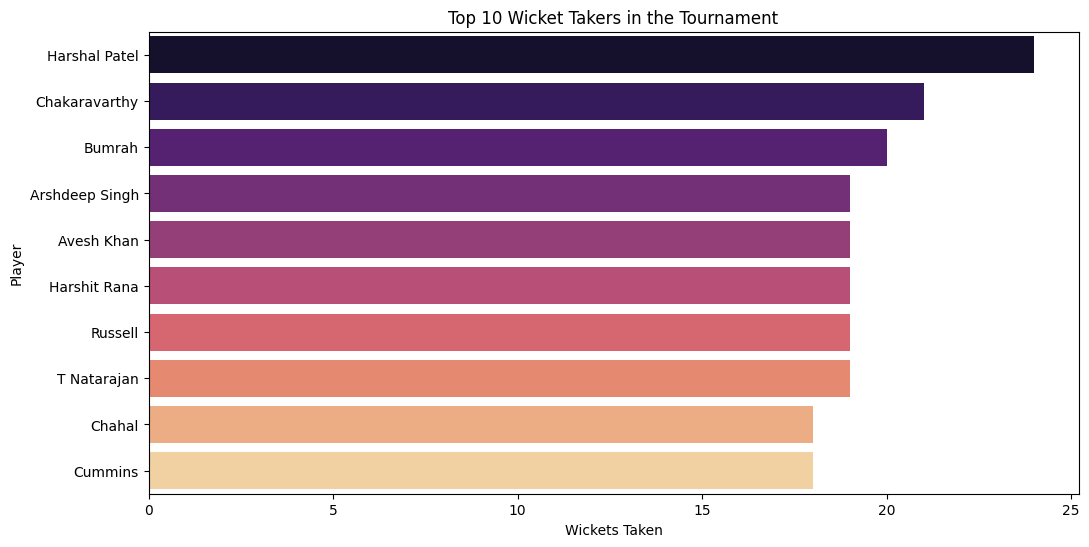

In [4]:
# Top Wicket Takers in the Tournament
top_wicket_takers = tournament_player_stats_df.nlargest(10, 'wickets_taken')
plt.figure(figsize=(12, 6))
sns.barplot(x='wickets_taken', y='player', data=top_wicket_takers, palette='magma')
plt.title('Top 10 Wicket Takers in the Tournament')
plt.xlabel('Wickets Taken')
plt.ylabel('Player')
plt.show()

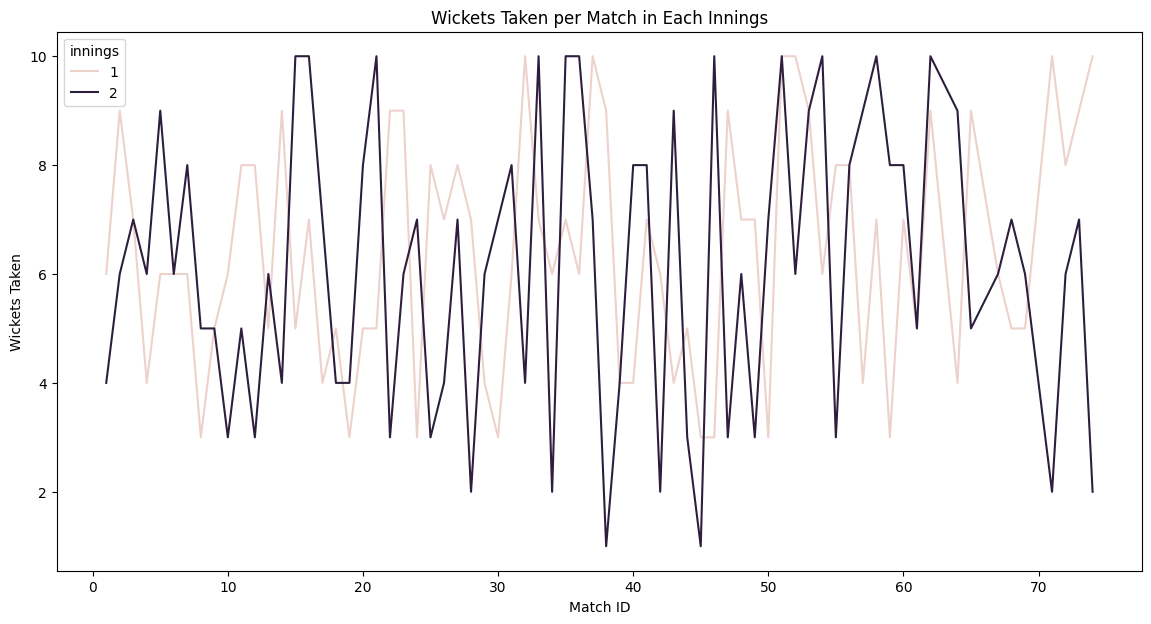

In [6]:
# Match-wise Wickets Analysis
match_wickets = data_df[data_df['wicket_type'].notnull()].groupby(['match_id', 'innings']).size().reset_index(name='wickets')
plt.figure(figsize=(14, 7))
sns.lineplot(x='match_id', y='wickets', hue='innings', data=match_wickets, markers=True)
plt.title('Wickets Taken per Match in Each Innings')
plt.xlabel('Match ID')
plt.ylabel('Wickets Taken')
plt.show()

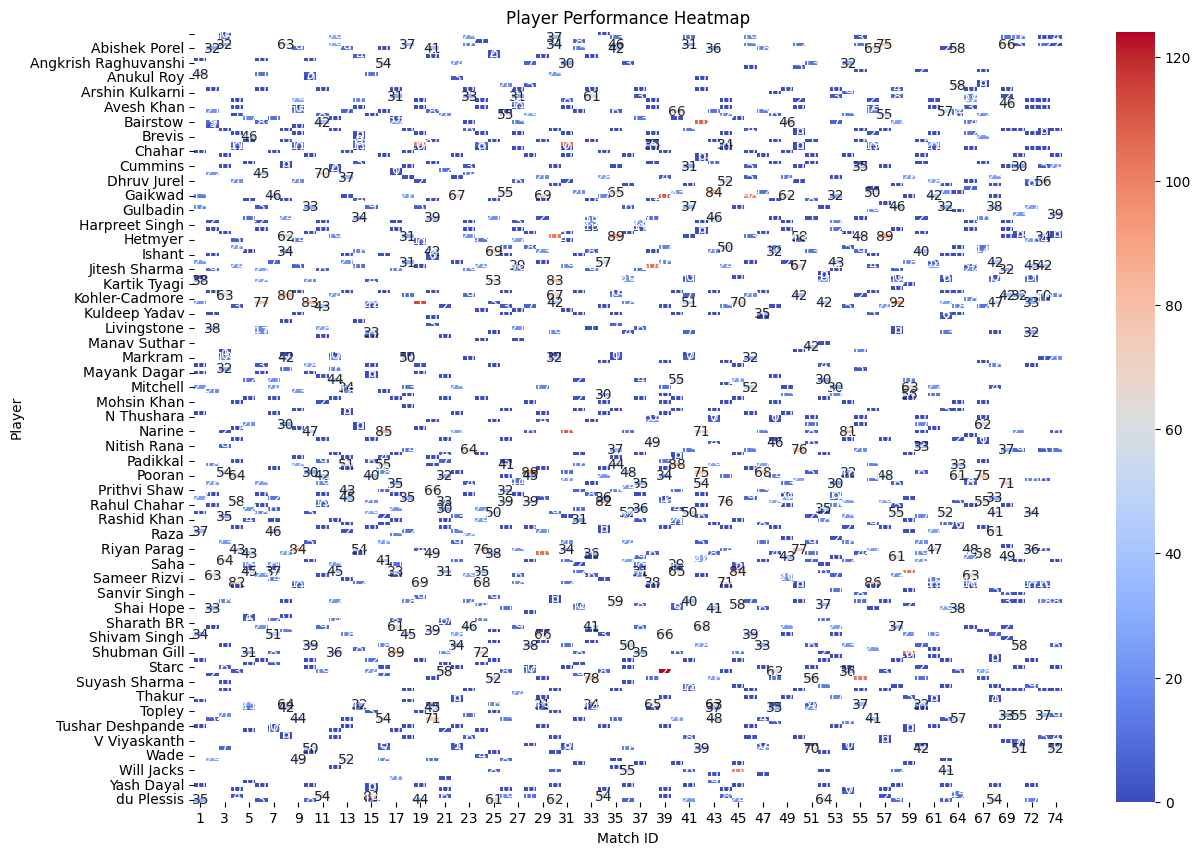

In [5]:
# 3. Player Performance Heatmap
heatmap_data = matchwise_player_stats_df.pivot_table(index='player', columns='match_id', values='runs_scored', aggfunc='sum')

# Create a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt='g')
plt.title('Player Performance Heatmap')
plt.xlabel('Match ID')
plt.ylabel('Player')
plt.show()

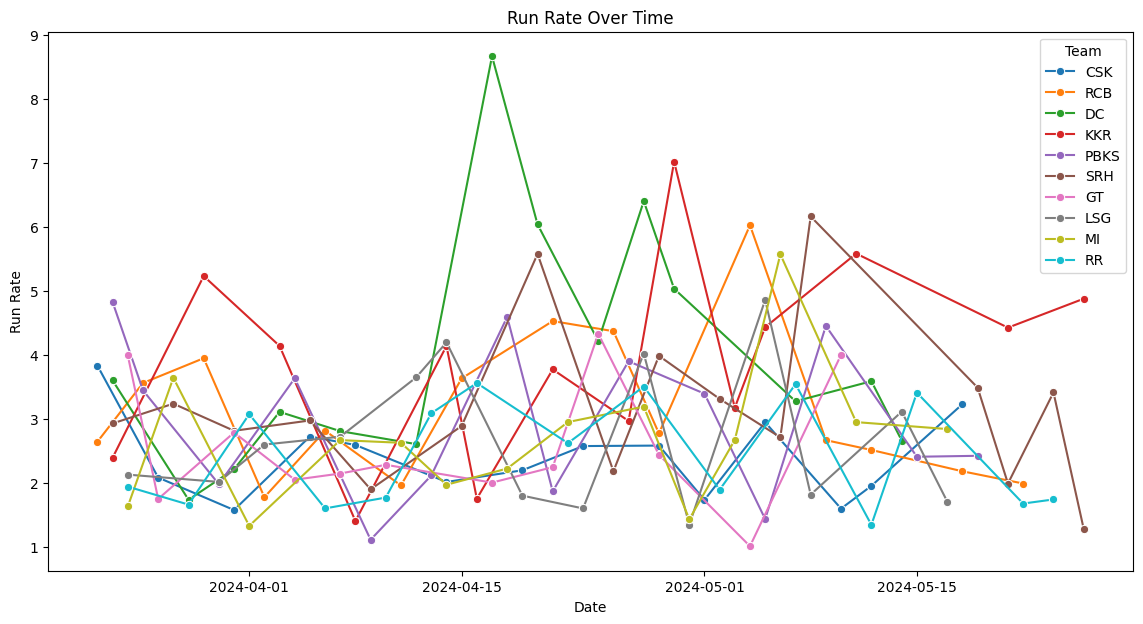

In [7]:
# Calculate run rate as runs per over
data_df['run_rate'] = (data_df['Runs_scored'] / data_df['over'])*6

# Aggregate run rate by date for each team
run_rate_over_time = data_df.groupby(['date', 'batting_team']).agg({'run_rate': 'mean'}).reset_index()
run_rate_over_time.columns = ['date', 'team', 'run_rate']

# Ensure 'date' is in datetime format
run_rate_over_time['date'] = pd.to_datetime(run_rate_over_time['date'])

# Create the line chart
plt.figure(figsize=(14, 7))
sns.lineplot(x='date', y='run_rate', hue='team', data=run_rate_over_time, marker='o')
plt.title('Run Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Run Rate')
plt.legend(title='Team')
plt.show()

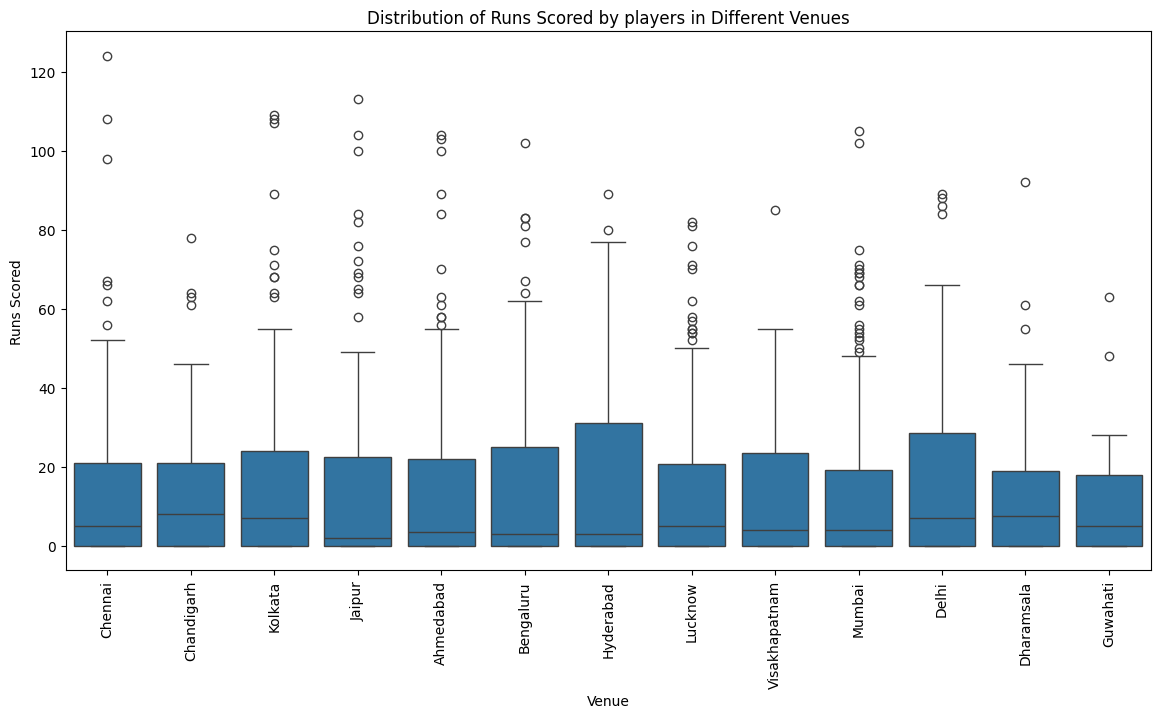

In [8]:
# Assuming `data` DataFrame includes 'venue' and 'Runs_scored' columns

plt.figure(figsize=(14, 7))
sns.boxplot(x='venue', y='runs_scored', data=matchwise_player_stats_df)
plt.title('Distribution of Runs Scored by players in Different Venues')
plt.xlabel('Venue')
plt.ylabel('Runs Scored')
plt.xticks(rotation=90)
plt.show()